In [1]:
import pickle

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from custom_transformers.stability_selection import StabilitySelection

In [2]:
seed = 15
np.random.seed(seed)
n_jobs = joblib.cpu_count() - 1

In [3]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = DATA["X_gpa"]
    X_snps = DATA["X_snps"]
    X_genexp = StandardScaler().fit_transform(DATA["X_genexp"])

In [ ]:
X_gpa_genexp = np.concatenate([X_gpa, X_genexp], axis=1)
X_snps_genexp = np.concatenate([X_snps, X_genexp], axis=1)
X_gpa_snps = np.concatenate([X_gpa, X_snps], axis=1)
X_all = np.concatenate([X_gpa, X_snps, X_genexp], axis=1)
y = pheno["Colistin"].to_numpy()

# Dimensionality reduction

## Stability selection

In [4]:
thresholds = np.arange(.6, .9, .01)
logreg_mod = LogisticRegression(class_weight="balanced", max_iter=1000)

### snps

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

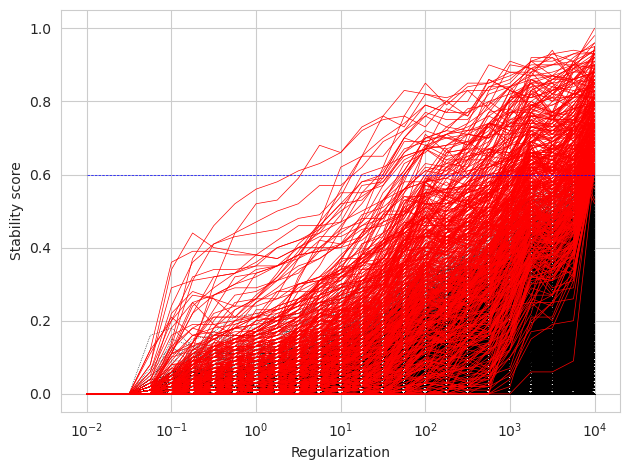

In [5]:
stab_sel_snps = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_snps = stab_sel_snps.fit(X_snps, y)
stab_sel_snps.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

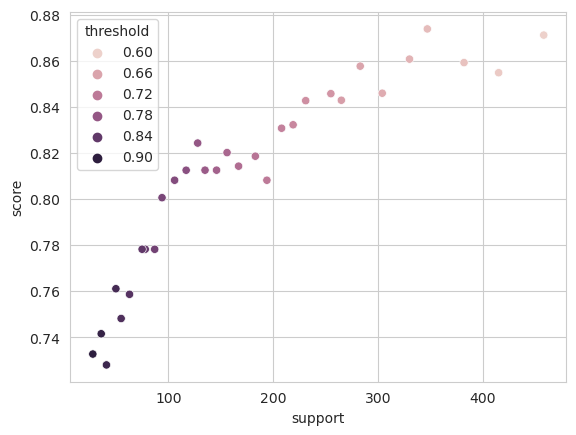

In [6]:
stab_sel_snps_score = []
stab_sel_snps_support = []
for threshold in thresholds:
    stab_sel_snps.threshold = threshold
    stab_sel_snps_score.append(cross_val_score(logreg_mod, stab_sel_snps.transform(X_snps), y,
                                               n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_snps_support.append(len(stab_sel_snps.get_support(indices=True)))

stab_sel_best_snps = thresholds[np.argmax(stab_sel_snps_score)]

df = pd.DataFrame({"score": stab_sel_snps_score,
                   "support": stab_sel_snps_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### genexp

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

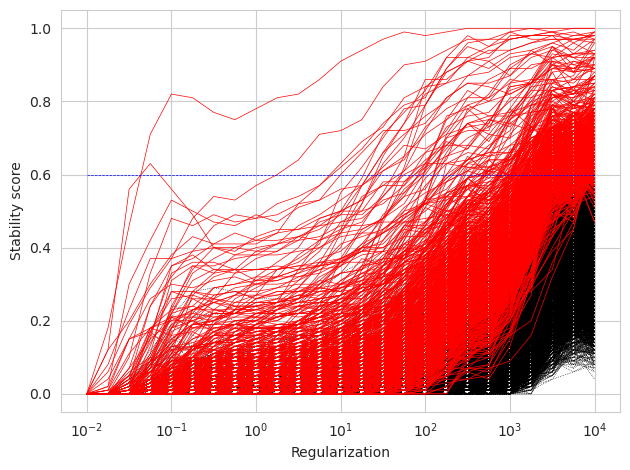

In [7]:
stab_sel_genexp = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_genexp = stab_sel_genexp.fit(X_genexp, y)
stab_sel_genexp.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

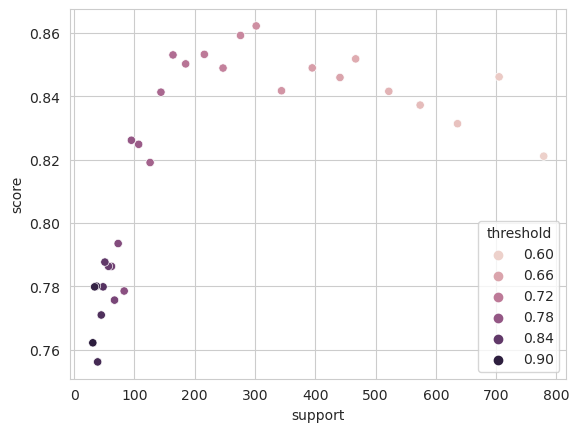

In [8]:
stab_sel_genexp_score = []
stab_sel_genexp_support = []
for threshold in thresholds:
    stab_sel_genexp.threshold = threshold
    stab_sel_genexp_score.append(cross_val_score(logreg_mod, stab_sel_genexp.transform(X_genexp), y,
                                                 n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_genexp_support.append(len(stab_sel_genexp.get_support(indices=True)))

stab_sel_best_genexp = thresholds[np.argmax(stab_sel_genexp_score)]

df = pd.DataFrame({"score": stab_sel_genexp_score,
                   "support": stab_sel_genexp_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### gpa

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

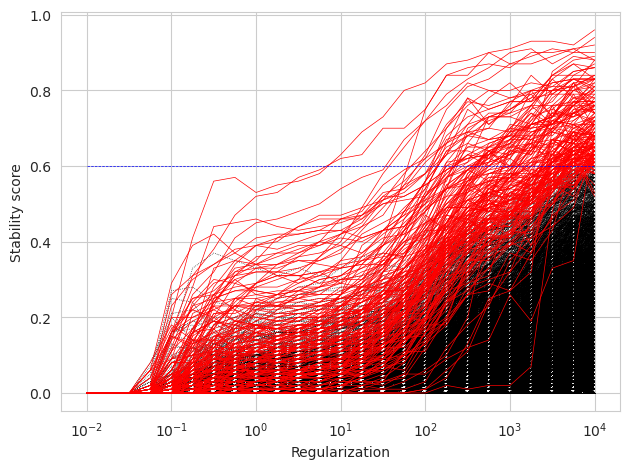

In [9]:
stab_sel_gpa = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_gpa = stab_sel_gpa.fit(X_gpa, y)
stab_sel_gpa.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

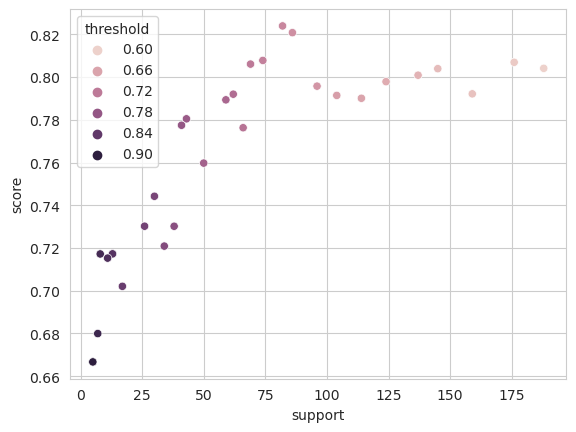

In [10]:
stab_sel_gpa_score = []
stab_sel_gpa_support = []
for threshold in thresholds:
    stab_sel_gpa.threshold = threshold
    stab_sel_gpa_score.append(cross_val_score(logreg_mod, stab_sel_gpa.transform(X_gpa), y,
                                              n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_gpa_support.append(len(stab_sel_gpa.get_support(indices=True)))

stab_sel_best_gpa = thresholds[np.argmax(stab_sel_gpa_score)]

df = pd.DataFrame({"score": stab_sel_gpa_score,
                   "support": stab_sel_gpa_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### gpa & genexp

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

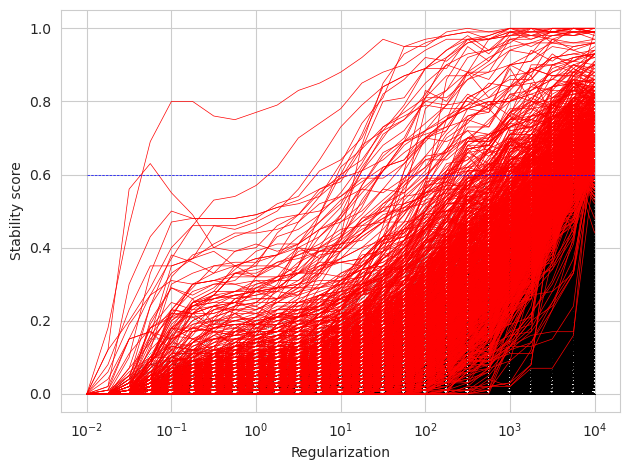

In [11]:
stab_sel_gpa_genexp = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_gpa_genexp = stab_sel_gpa_genexp.fit(X_gpa_genexp, y)
stab_sel_gpa_genexp.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

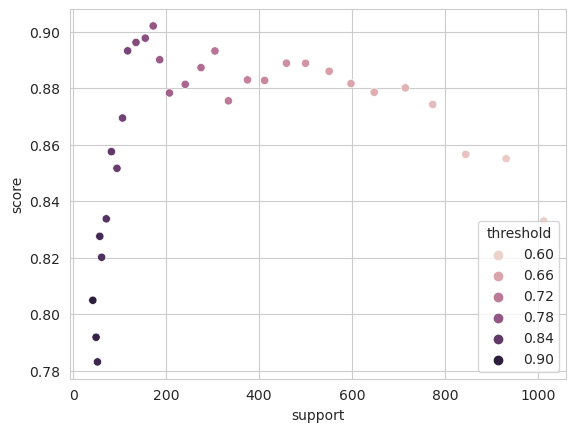

In [12]:
stab_sel_gpa_genexp_score = []
stab_sel_gpa_genexp_support = []
for threshold in thresholds:
    stab_sel_gpa_genexp.threshold = threshold
    stab_sel_gpa_genexp_score.append(cross_val_score(logreg_mod, stab_sel_gpa_genexp.transform(X_gpa_genexp), y,
                                                     n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_gpa_genexp_support.append(len(stab_sel_gpa_genexp.get_support(indices=True)))

stab_sel_best_gpa_genexp = thresholds[np.argmax(stab_sel_gpa_genexp_score)]

df = pd.DataFrame({"score": stab_sel_gpa_genexp_score,
                   "support": stab_sel_gpa_genexp_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### snps & genexp

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

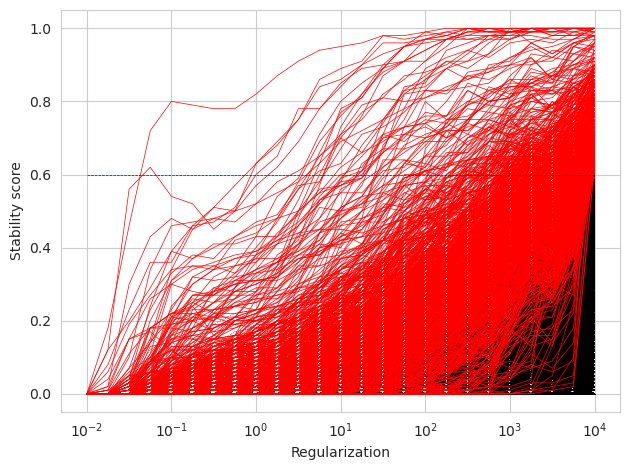

In [13]:
stab_sel_snps_genexp = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_snps_genexp = stab_sel_snps_genexp.fit(X_snps_genexp, y)
stab_sel_snps_genexp.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

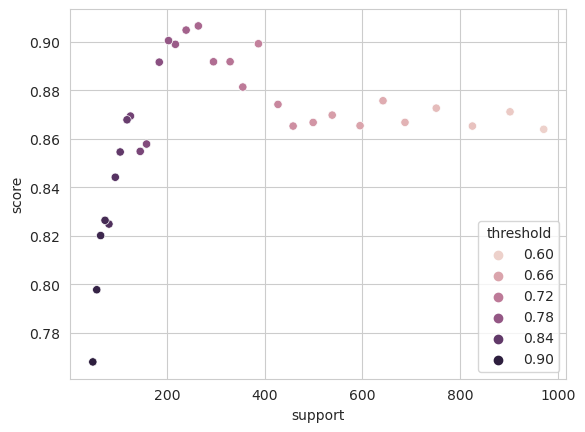

In [14]:
stab_sel_snps_genexp_score = []
stab_sel_snps_genexp_support = []
for threshold in thresholds:
    stab_sel_snps_genexp.threshold = threshold
    stab_sel_snps_genexp_score.append(cross_val_score(logreg_mod, stab_sel_snps_genexp.transform(X_snps_genexp), y,
                                                      n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_snps_genexp_support.append(len(stab_sel_snps_genexp.get_support(indices=True)))

stab_sel_best_snps_genexp = thresholds[np.argmax(stab_sel_snps_genexp_score)]

df = pd.DataFrame({"score": stab_sel_snps_genexp_score,
                   "support": stab_sel_snps_genexp_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### gpa & snps

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

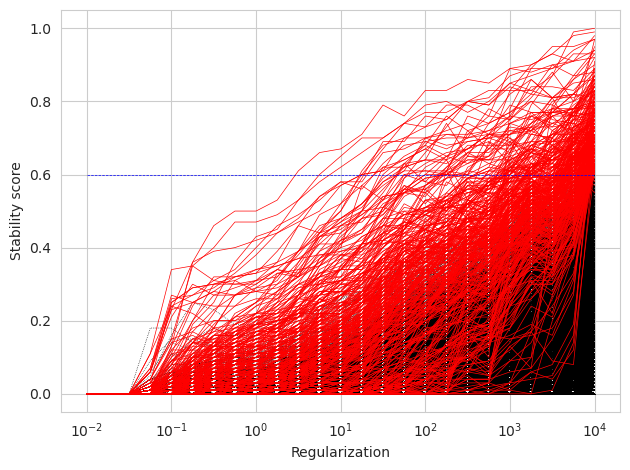

In [15]:
stab_sel_gpa_snps = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_gpa_snps = stab_sel_gpa_snps.fit(X_gpa_snps, y)
stab_sel_gpa_snps.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

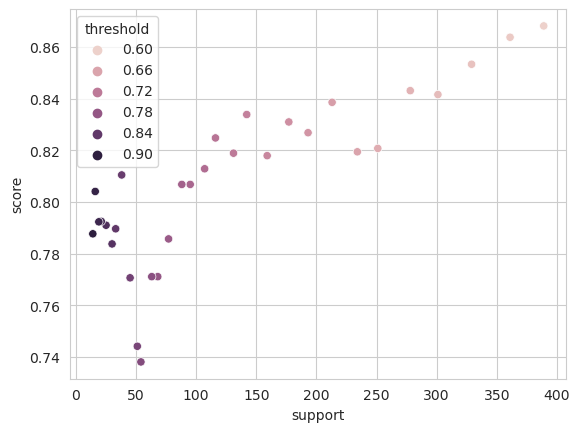

In [16]:
stab_sel_gpa_snps_score = []
stab_sel_gpa_snps_support = []
for threshold in thresholds:
    stab_sel_gpa_snps.threshold = threshold
    stab_sel_gpa_snps_score.append(cross_val_score(logreg_mod, stab_sel_gpa_snps.transform(X_gpa_snps), y,
                                                   n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_gpa_snps_support.append(len(stab_sel_gpa_snps.get_support(indices=True)))

stab_sel_best_gpa_snps = thresholds[np.argmax(stab_sel_gpa_snps_score)]

df = pd.DataFrame({"score": stab_sel_gpa_snps_score,
                   "support": stab_sel_gpa_snps_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")

### gpa & snps & genexp

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Regularization', ylabel='Stability score'>)

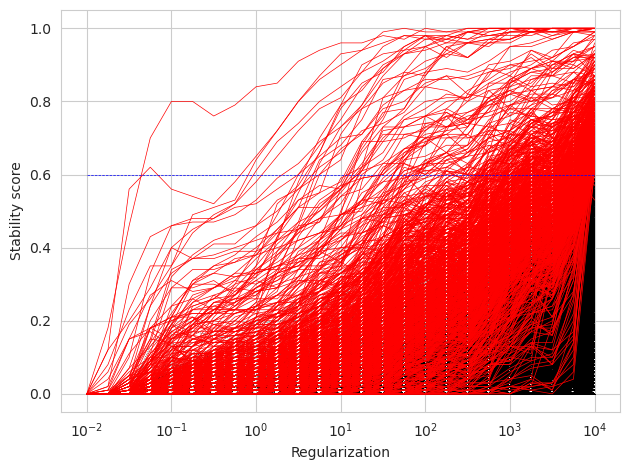

In [17]:
stab_sel_all = StabilitySelection(random_state=seed, n_jobs=n_jobs)
stab_sel_all = stab_sel_all.fit(X_all, y)
stab_sel_all.plot_path()

<AxesSubplot: xlabel='support', ylabel='score'>

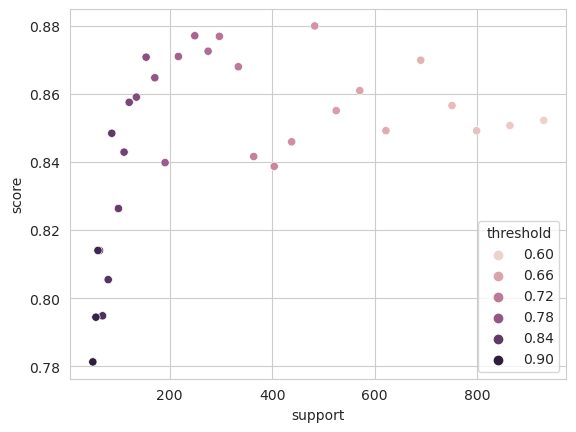

In [18]:
stab_sel_all_score = []
stab_sel_all_support = []
for threshold in thresholds:
    stab_sel_all.threshold = threshold
    stab_sel_all_score.append(cross_val_score(logreg_mod, stab_sel_all.transform(X_all), y,
                                              n_jobs=n_jobs, scoring="balanced_accuracy").mean())
    stab_sel_all_support.append(len(stab_sel_all.get_support(indices=True)))

stab_sel_best_all = thresholds[np.argmax(stab_sel_all_score)]

df = pd.DataFrame({"score": stab_sel_all_score,
                   "support": stab_sel_all_support,
                   "threshold": thresholds})
sns.scatterplot(data=df, x="support", y="score", hue="threshold")